<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Теорема" data-toc-modified-id="Теорема-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Теорема</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


* Данные без пропусков, вссе переменные кодированны численно, в том числе и категориальные
* Признаки - Пол, Возраст, Зарплата, Члены семьи. Таргет - Страховые выплаты

In [5]:
df.columns = [
    'sex', 'age', 'salary', 'num_of_family_members', 'num_of_insurance_payments'
]

In [6]:
df['num_of_insurance_payments'].unique()

array([0, 1, 2, 3, 5, 4])

In [7]:
df.describe()

,sex,age,salary,num_of_family_members,num_of_insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


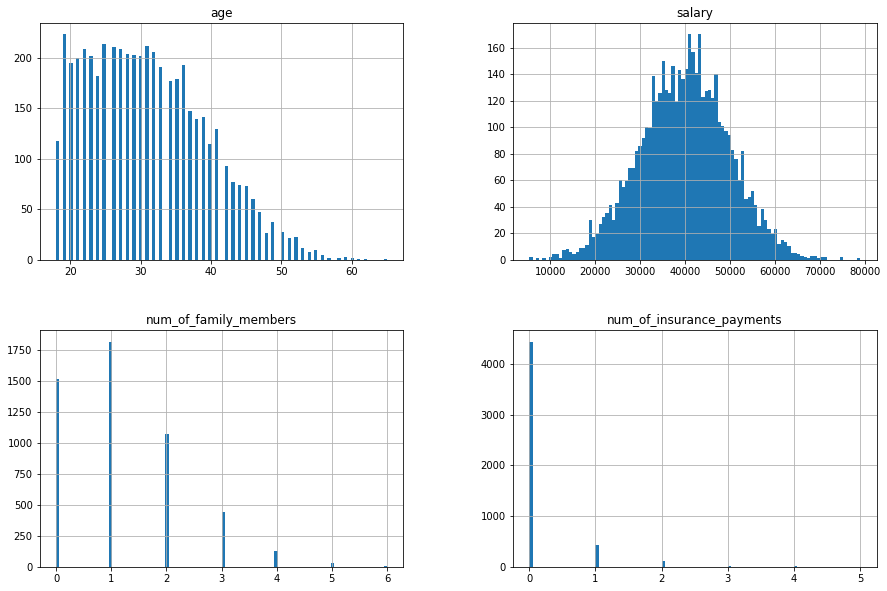

In [8]:
df.drop(columns=['sex']).hist(figsize=(15,10), bins=100);

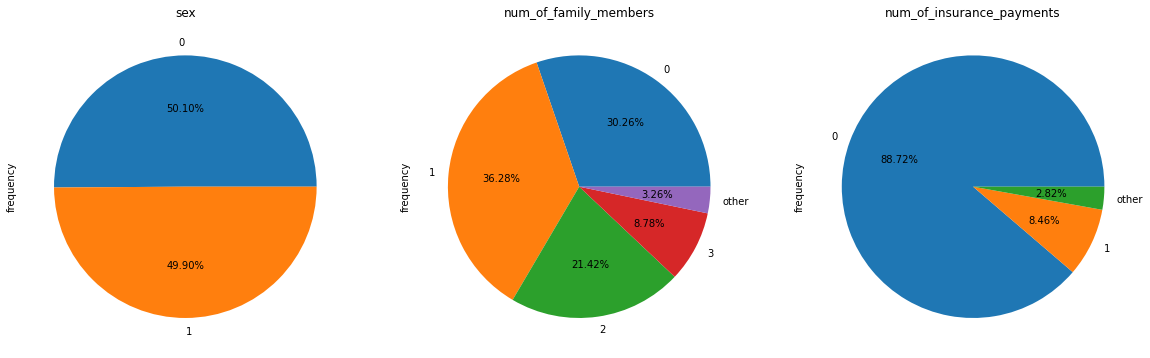

In [9]:
xlabel = df.drop(columns=['age', 'salary']).columns
for i, x in enumerate(df.drop(columns=['age', 'salary'])):
    plt.subplot(1,3,i+1)
    sup_df = df.pivot_table(index=xlabel[i], aggfunc='count')[xlabel[i-1]]
    
    del_list = []
    counter = 0
    for element, num in sup_df.items():
        if num / sup_df.sum() < 0.05:
            del_list.append(element)
            counter += num
    if counter != 0:
        sup_df.drop(del_list, inplace=True)
        sup_df['other'] = counter

    sup_df.plot(kind='pie', figsize=(20, 15), autopct='%1.2f%%') 
    plt.title(xlabel[i])
    plt.ylabel('frequency')
plt.show()

## Умножение матриц

### Теорема
При умножении матрицы признаков на обратимую матрицу предсказания не изменятся

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Исходное:**
* Предсказания:

$$
a = Xw
$$

* Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

* Формула обучения:

$$
w = [X^T X]^{-1} X^T y
$$

* Итоговая формула: 
$$ 
a = X[X^T X]^{-1} X^T y
$$

**При умножении X на P:**
$$ \hat{a} = XP\hat{w}$$
$$\hat{w} = [(XP)^T (XP)]^{-1} (XP)^T y$$
В итоге:
$$ \hat{a} = XP[(XP)^T (XP)]^{-1} (XP)^T y $$
**Произведем преобразование:**
$$ \hat{a} = XP[P^T X^T XP]^{-1} P^T X^T y $$
* Ввиду того, что матрица P обратима:
$$ \hat{a} = XPP^{-1} [X^T X[^{-1} P^{T-1} P^T X^T y $$
$$ \hat{a} = X [X^T X]^{-1} X^T y $$
$$ \Rightarrow \hat{a} = a $$

## Алгоритм преобразования

Исходя из теоремы, необходимо умножить матрицу признаков на любую обратимую матрицу, т.е. матрицу 4x4, а затем фитить линейную модель как в тривиальном случае

In [10]:
X_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['num_of_insurance_payments']), df['num_of_insurance_payments'], 
                                                    test_size=0.25, random_state=42)

In [11]:
while True:
    p = np.random.random((4, 4))
    if np.linalg.det(p) != 0:
        break

In [12]:
X_train_encrypted = X_train @ p
x_test_encrypted = x_test @ p

In [13]:
X_train_encrypted.head()

,0,1,2,3
4884,6046.692005,19853.891480,14450.212867,36817.843231
3163,5004.850079,16445.159152,11966.861752,30496.997133
490,6555.445312,21532.125529,15670.628535,39930.509560
862,5212.302809,17091.407255,12442.053575,31693.426114
1740,6169.044924,20250.164027,14738.617827,37552.060215


In [14]:
(X_train_encrypted @ np.linalg.inv(p)).head().style.format('{:.1f}')

,0,1,2,3
4884,-0.0,34.0,40200.0,-0.0
3163,-0.0,23.0,33300.0,1.0
490,-0.0,34.0,43600.0,-0.0
862,1.0,36.0,34600.0,1.0
1740,-0.0,36.0,41000.0,1.0


Как видно, данные зашифрованы, а исходные можно легко получить по ключу

In [15]:
model = LinearRegression()

model.fit(X_train_encrypted, y_train)
y_pred = model.predict(x_test_encrypted)
print(f'r^2 = {r2_score(y_test, y_pred):.4f}')

r^2 = 0.4255


## Проверка алгоритма

In [16]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(x_test)
print(f'r^2 = {r2_score(y_test, y_pred):.4f}')

r^2 = 0.4255


## Вывод
Признаки для линейной регрессии можно шифровать путем домножения их на невырожденную матрицу, качество от этого не меняется
